In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm import tqdm
import random
from pylab import *
import os

In [2]:
contents = open('1652767558_mult0.0_dec5e-05_r1.0.log', 'r').read().split('\n')
contents = contents[:-1]


names= []
times = []
x = []
y = []

for c in contents:
    name, time, x_value, y_value = c.split(',')

    names.append(str(name))
    times.append(float(time))
    x.append(float(x_value))
    y.append(float(y_value))

In [8]:
# x = np.linspace(0, 2*np.pi, 100)
# y = np.sin(x)

In [3]:
proto_path = '/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/prototypes/prototypes-2d-1000c.npy'
protos = np.load(proto_path)

In [4]:
NUM_COLORS = len(x)
cm = plt.get_cmap('gist_rainbow')
colors_arr = []
for i in range(NUM_COLORS):
    colors_arr.append(cm(i//1*1.0/NUM_COLORS))

Text(-100, -100, 'Prototype')

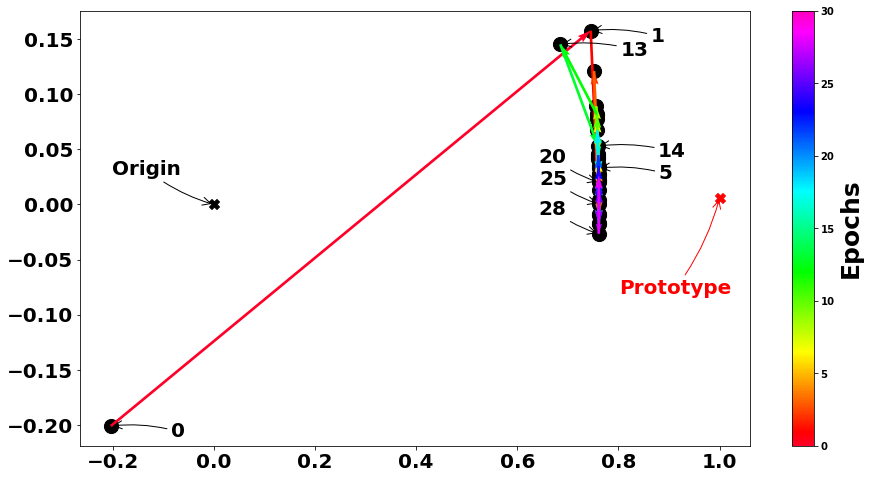

In [43]:
from pylab import *
x = np.array(x)
y = np.array(y)
annotations = np.arange(0, len(x),1)

colormap = plt.cm.get_cmap('gist_rainbow') # 'plasma' or 'viridis' or 'jet'
colors = colormap(annotations)

fig = plt.figure(figsize=(15,8))
ax = plt.axes()
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.scatter(x, y, s= 200, color = 'black')
plt.scatter(0,0, color = 'black', marker = 'X', s = 100)
plt.scatter(protos[1][0], protos[1][1], color = 'red', marker = 'X', s = 100)
plt.xticks( size = 20)
plt.yticks( size = 20)
# plt.xlim(-0.5, 1)
# plt.ylim(-0.24, 0.2)
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=0, vmax=NUM_COLORS)
cbar = fig.colorbar(sm)
cbar.set_label(label='Epochs',weight='bold', size = 25)
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width = 0.004, color = colors_arr)

old_x = old_y = 1e9 # make an impossibly large initial offset
thresh = .1 #make a distance threshold
numbers = [0,1,5,13, 14, 20,25, 28]
flipping = [0,5]

for i, label in enumerate(annotations):
    if i in numbers:
        x_i = x[i]
        y_i = y[i]
        #calculate distance
        d = ((x_i-old_x)**2+(y_i-old_y)**2)**(.5) - 1414213561
        # print(d)

        #if distance less than thresh then flip the arrow
        flip = 1
        if d < 0.8 or i in flipping: flip=-1

        plt.annotate(label, xy =  (x_i, y_i), fontsize=20, xytext = (-60*flip, 15*flip),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0.1'), color = 'black')
#plt.show()

plt.annotate('Origin', xy =  (0, 0), fontsize=20, xytext = (-60*1.7, 15*1.7),
textcoords = 'offset points', ha = 'left', va = 'bottom',
arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0.1'), color = 'black')


plt.annotate('Prototype', xy =  (protos[1][0], protos[1][1]), fontsize=20, xytext = (-100,-100),
textcoords = 'offset points', ha = 'left', va = 'bottom',
arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0.1', color='red'), color = 'red')

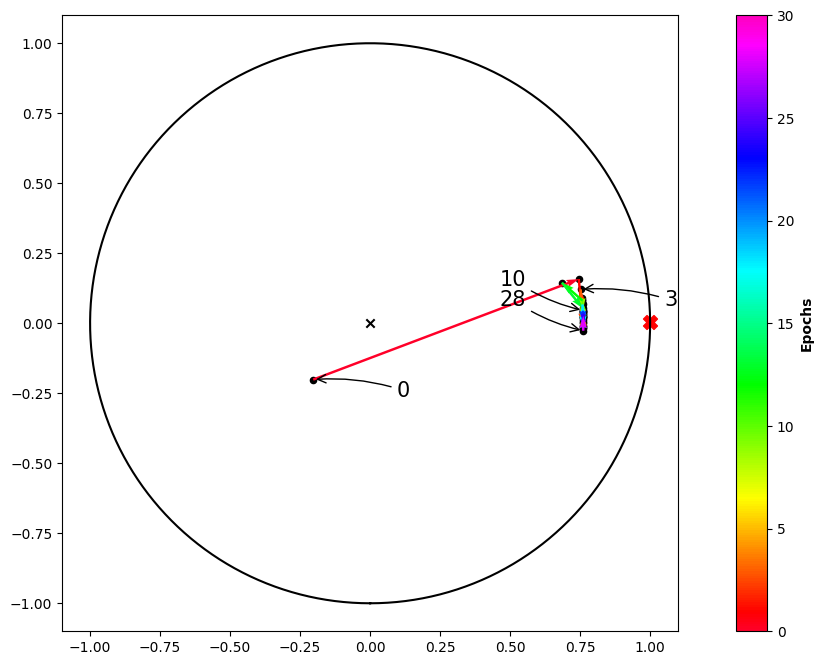

In [167]:
style.use('default')
x = np.array(x)
y = np.array(y)
annotations = np.arange(0, len(x),1)


fig1 = plt.figure(figsize=(15,8))
ax = plt.axes()

ax.set_aspect(1)
theta = np.linspace(-np.pi, np.pi, 200)
plt.plot(np.sin(theta), np.cos(theta), c = 'black')

plt.scatter(x, y, s= 20, color = 'black')
plt.scatter(0,0, color = 'black', marker = 'x')
plt.scatter(protos[1][0], protos[1][1], color = 'red', marker = 'X', s = 100)
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=0, vmax=NUM_COLORS)
cbar = plt.colorbar(sm)
cbar.set_label(label='Epochs',weight='bold')
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width = 0.004, color = colors_arr)
old_x = old_y = 1e9 # make an impossibly large initial offset
thresh = .1 #make a distance threshold
numbers = [0,3,10, 28]

for i, label in enumerate(annotations):
    if i in numbers:
        x_i = x[i]
        y_i = y[i]
        #calculate distance
        d = ((x_i-old_x)**2+(y_i-old_y)**2)**(.5) - 1414213561
        # print(d)

        #if distance less than thresh then flip the arrow
        flip = 1
        if d < 0.8 or i == 0: flip=-1

        plt.annotate(label, xy =  (x_i, y_i), fontsize=15, xytext = (-60*flip, 15*flip),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0.1'), color = 'black')
# plt.title('Plot of Class 1')
# plt.show()

In [18]:
def get_exp_plots(run):
    # matplotlib.use('Agg')
    curr_path =  os.getcwd()
    plot_path = os.path.join(curr_path + '/exp_plots')

    if not os.path.exists(plot_path):
        os.makedirs(plot_path)
    
    contents = open(run, 'r').read().split('\n')
    if contents[-1] == '':
        contents = contents[:-1]

    names= []
    times = []
    x = []
    y = []

    for c in contents:
        name, time, x_value, y_value = c.split(',')
        names.append(str(name))
        times.append(float(time))
        x.append(float(x_value))
        y.append(float(y_value))

    # Defining Arrow Colors
    NUM_COLORS = len(x)
    cm = plt.get_cmap('gist_rainbow')
    colors_arr = []
    for i in range(NUM_COLORS):
        colors_arr.append(cm(i//1*1.0/NUM_COLORS))

    
    # Detailed Plot
    x = np.array(x)
    y = np.array(y)
    annotations = np.arange(0, len(x),1)

    colormap = plt.cm.get_cmap('gist_rainbow') # 'plasma' or 'viridis' or 'jet'
    colors = colormap(annotations)

    fig = plt.figure(figsize=(15,8))
    ax = plt.axes()

    plt.scatter(x, y, s= 200, color = 'black')
    sm = plt.cm.ScalarMappable(cmap=colormap)
    sm.set_clim(vmin=0, vmax=NUM_COLORS)
    cbar = fig.colorbar(sm)
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width = 0.004, color = colors_arr)
    for i, label in enumerate(annotations):
        if i % 2 == 0:
            plt.annotate(label, (x[i], y[i]), fontsize=25)
    plt.title(f'Plot of Class 1')
    plt.savefig(f'{plot_path}/det_plot.png')

    # Circle Plot
    fig1 = plt.figure(figsize=(15,8))
    ax = plt.axes()

    ax.set_aspect(1)
    theta = np.linspace(-np.pi, np.pi, 200)
    plt.plot(np.sin(theta), np.cos(theta), c = 'black')

    plt.scatter(x, y, s= 20, color = 'black')
    sm = plt.cm.ScalarMappable(cmap=colormap)
    sm.set_clim(vmin=0, vmax=NUM_COLORS)
    plt.colorbar(sm)
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width = 0.004, color = colors_arr)
    for i, label in enumerate(annotations):
        if i % 2 == 0:
            plt.annotate(label, (x[i], y[i]), fontsize=25)
    plt.savefig(f'{plot_path}/circle_plot.png')
    
    return fig, fig1

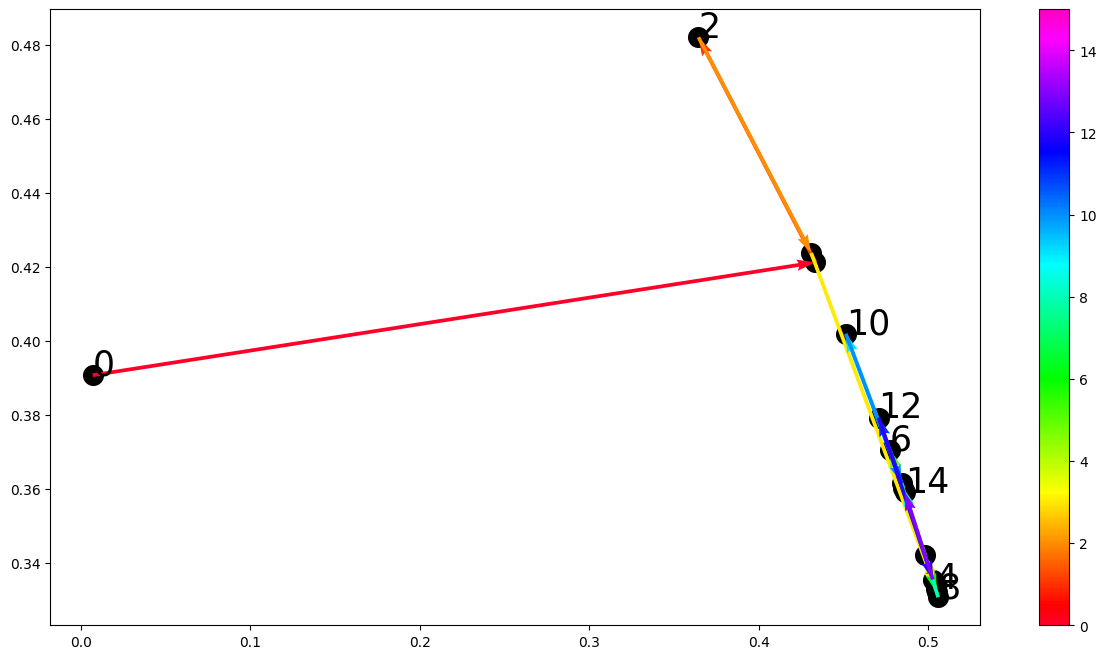

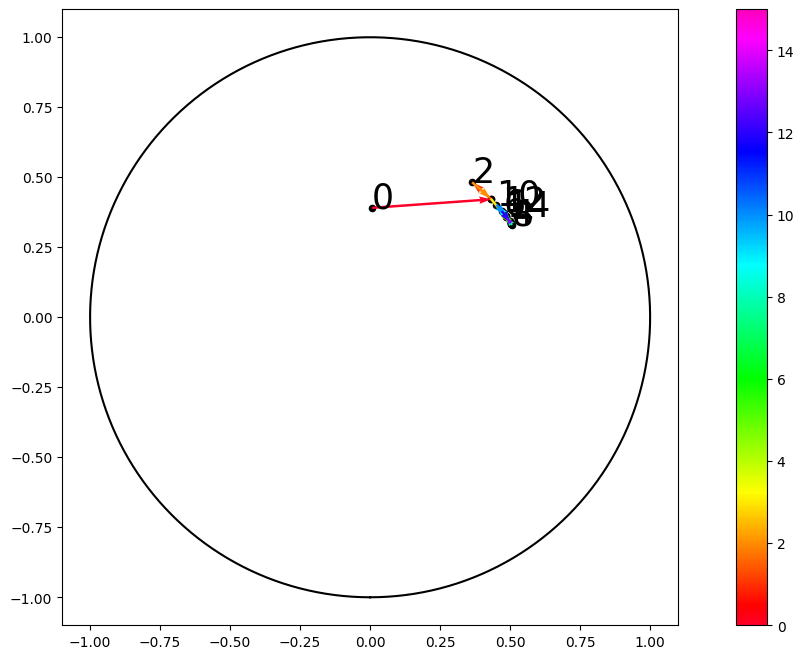

In [19]:
test, test1 = get_exp_plots('1652250118_mult0.001_dec5e-05_r0.7.log')

In [14]:
curr_path = os.getcwd()
plot_path = os.path.join(curr_path + '/exp_plots')

In [15]:
plot_path

'/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/exp_plots'

In [16]:
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

NameError: name 'plot_path' is not defined

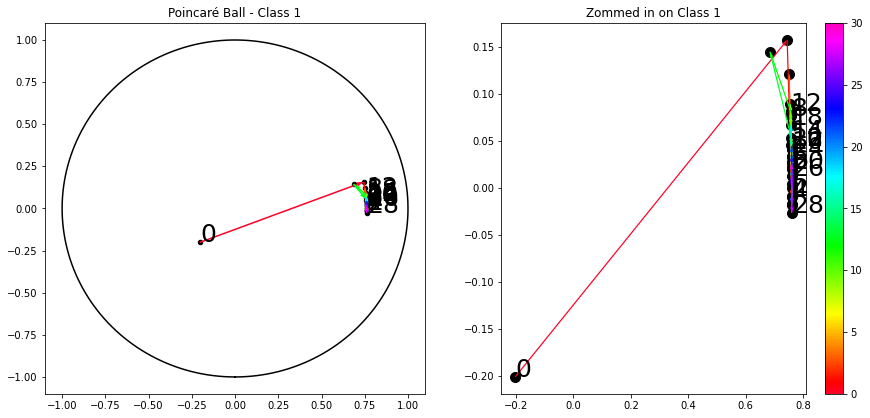

In [5]:

# Defining Arrow Colors
NUM_COLORS = len(x)
cm = plt.get_cmap('gist_rainbow')
colors_arr = []
for i in range(NUM_COLORS):
    colors_arr.append(cm(i//1*1.0/NUM_COLORS))


# Detailed Plot
x = np.array(x)
y = np.array(y)
annotations = np.arange(0, len(x),1)

colormap = plt.cm.get_cmap('gist_rainbow') # 'plasma' or 'viridis' or 'jet'
colors = colormap(annotations)

fig = plt.figure(figsize=(15,15))
plt.subplot(2,2,2)

plt.scatter(x, y, s= 100, color = 'black')
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=0, vmax=NUM_COLORS)
cbar = fig.colorbar(sm)
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width = 0.004, color = colors_arr)
for i, label in enumerate(annotations):
    if i % 2 == 0:
        plt.annotate(label, (x[i], y[i]), fontsize=25)
plt.title(f'Zommed in on Class 1')

# Circle Plot
plt.subplot(2,2,1)

# ax.set_aspect(1)
theta = np.linspace(-np.pi, np.pi, 200)
plt.plot(np.sin(theta), np.cos(theta), c = 'black')

plt.scatter(x, y, s= 20, color = 'black')
# sm = plt.cm.ScalarMappable(cmap=colormap)
# sm.set_clim(vmin=0, vmax=NUM_COLORS)
# plt.colorbar(sm)
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width = 0.004, color = colors_arr)
for i, label in enumerate(annotations):
    if i % 2 == 0:
        plt.annotate(label, (x[i], y[i]), fontsize=25)
plt.title(f'Poincaré Ball - Class 1')
plt.savefig(f'{plot_path}/circle_plot.png')

fig.tight_layout()

# Barplot

In [58]:
onek = [0.85, 0.83, 0.75, 0.6, 0.45]
two = [0.1, 0.2, 0.3, 0.4, 0.5]
labels = ['0.001', '0.3', '0.5', '0.7', '1.0', '5.0']

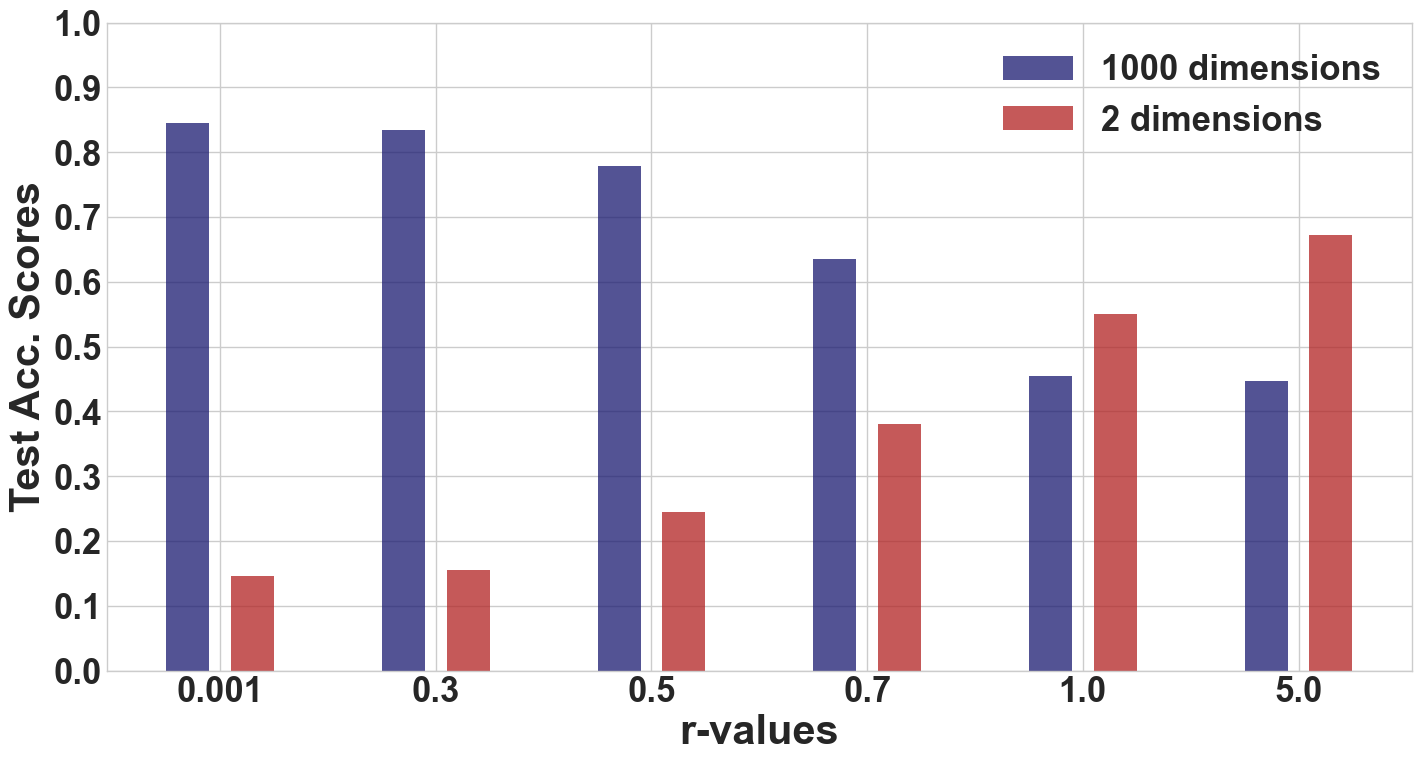

In [60]:
style.use('seaborn-whitegrid') 
fig = plt.figure(figsize=(15,8))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.bar([0.85, 1.85, 2.85, 3.85, 4.85, 5.85],[0.845, 0.834, 0.779, 0.635, 0.454, 0.447],
label="1000 dimensions", color='midnightblue', width=0.2, alpha=0.75)
plt.bar([1.15,2.15,3.15,4.15,5.15, 6.15],[0.146, 0.155, 0.245, 0.380, 0.55, 0.672],
label="2 dimensions", color='firebrick',width=0.2, alpha=0.75)
plt.legend(prop={'size': 25})
plt.xlabel('r-values', size = 30)
plt.xticks([1,2,3,4,5,6], labels, size = 25)
plt.yticks([0.0, 0.1, 0.2 ,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], size = 25)
plt.ylabel('Test Acc. Scores', size = 30)
# plt.title('Relationship of r-values & dimensions')
plt.show()